# Représentations graphiques avec Matplotlib

## Le module Matplotlib

En important la bibliothèque pyplot de Matplotlib avec l'instruction : `import matplotlib.pyplot as plt`, tous les appels d'instructions de `pyplot` seront à faire précéder de  `plt`.

Pour visualiser une figure, il faut terminer par l'instruction `plt.show()`, ce qui a pour effet d'ouvrir une fenêtre contenant le graphique désiré.


In [2]:
 import matplotlib.pyplot as plt

## Point, segment, ligne brisée, nuage de points
 

|Objet|instruction|
| :--- | :--- |
|Point de coordonnées (x, y)|`plt.plot(x, y, style)`|
| Segment dont les extrémités ont pour coordonnées (x1, y1) et (x2, y2)|`plt.plot([x1, x2],[y1, y2], style)`|
| Nuage de points ou ligne brisée|`plt.plot(Liste des abscisses, Liste des ordonnées, style)`|

Le **style** est indispensable pour un point ; il s'agit d'une chaine de caractères concaténant une lettre pour la *couleur* et un symbole pour la *forme*.  
Si on ne précise pas la forme des points, on obtient par défaut une ligne brisée.

Les *couleurs* disponibles sont :

`'b'`: bleu,  `'r'` : rouge, `'g'` : green, `'c'` : cyan,  `'m'` : magenta,  `'y'` : jaune,`'k'` : noir

Les *formes* disponibles sont :

`'.'` : point,  `'o'` : rond, `'s'` : carré, `'x'` : croix, `'*'` : étoile

Les types de *lignes* sont : 

`'-'` : trait plein, `'--'` : trait pointillé, `'-.'` : trait alterné
  

### Exemples

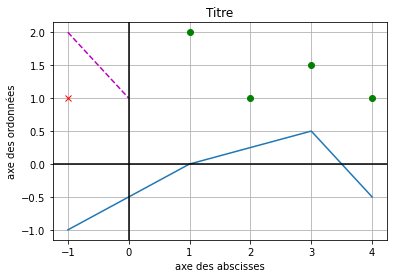

In [3]:
plt.plot(-1,1,'rx') # croix rouge
plt.plot([-1,0],[2,1],'m--') # segment pointillé magenta

plt.plot([1, 2, 3, 4], [2, 1, 1.5, 1],'go') # nuage de points verts
plt.plot([-1, 0, 1, 3, 4], [-1, -0.5, 0, 0.5, -0.5]) # ligne brisée (bleue par défaut)

plt.axhline(c ='k') # l'axe des abscisses, en noir
plt.axvline(c = 'k') # l'axe des ordonnées, en noir
plt.grid() # grille 
plt.title("Titre")
plt.xlabel("axe des abscisses")
plt.ylabel("axe des ordonnées")
plt.show()

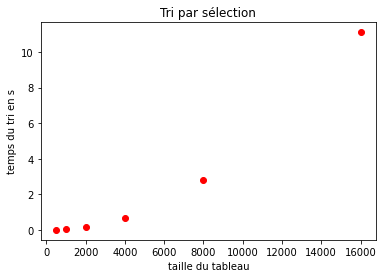

In [4]:
tailles = [500 * 2**i for i in range(6)]
temps = [0.011,0.043,0.174,0.682,2.82,11.1]
plt.plot(tailles, temps,'ro')
plt.xlabel('taille du tableau')
plt.ylabel('temps du tri en s')
plt.title('Tri par sélection')
plt.show()

### Remarque 
La dimension de la fenêtre est automatique mais on peut la choisir en utilisant l’instruction : `axis([xmin, xmax, ymin, ymax])`.  
On peut fixer uniquement l’axe des abscisses : `xlim(xmin, xmax)` ou uniquement l’axe des ordonnées : `ylim(ymin, ymax) `.

## Courbe représentative d’une fonction

La courbe représentative d’une fonction peut être obtenue avec un nuage de points ou une ligne brisée avec des points suffisamment nombreux. Il suffit de créer la liste des abscisses et celle des ordonnées. 

Pour créer la liste des abscisses, on peut utiliser les fonctions `arange` ou `linspace`du module numpy qu’il faut importer au préalable :  
`from numpy import arange, linspace`.  

La commande `arange(a, b, pas)` renvoie un tableau à une dimension avec des valeurs dans l'intervalle [a ; b[.  La première valeur est `a` et la différence entre deux valeurs est `pas` (nombre réel).  
La commande `linspace(a, b, n)` renvoie un tableau à une dimension avec n valeurs dans l'intervalle [a ; b].  La première valeur est `a` et la dernière est `b`.

### Exemple

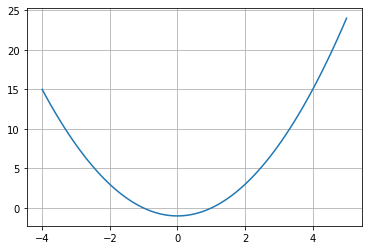

In [5]:
from numpy import linspace

def f(x):
    return(x**2 - 1)

abscisses = linspace(-4, 5, 100) 
ordonnees = f(abscisses) # ou [f(x) for x in abscisses]
plt.plot(abscisses, ordonnees)
plt.grid() # grille 
plt.show()

### Remarque  
On peut imposer les graduations sur les axes (qui sont automatiques par défaut).  
Pour avoir, par exemple, des graduations de −4 à 5 avec un pas de 1 sur l’axe des abscisses : `xticks(arange(-4,5,1))` ou  pour avoir 10 points régulièrement espacés entre -4 et 5 : `xticks(linspace(-4,5,10))`.  
De même pour l’axe des ordonnées : `yticks(np.arange(-10,10,1)`.

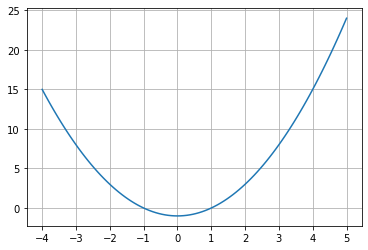

In [6]:
# abscisses et ordonnees sont définies plus haut
plt.plot(abscisses, ordonnees)
plt.xticks(linspace(-4, 5, 10))
plt.grid() # grille 
plt.show()

On peut représenter plusieurs courbes sur le même graphique, et ajouter une légende, qui peut être en $\LaTeX$. (à encadrer de $)

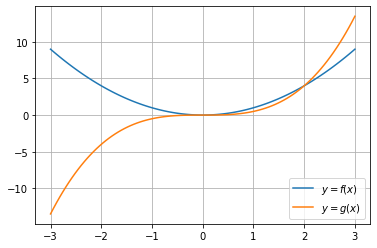

In [7]:
from numpy import linspace

def f(x):
    return x**2
def g(x):
    return x**3 / 2

abscisses = linspace(-3, 3, 100)

plt.plot(abscisses, f(abscisses), label = "$y = f(x)$")
plt.plot(abscisses, g(abscisses), label = "$y = g(x)$")

plt.legend(loc = 4); # valeur entre 1 et 4 pour l'un des 4 coins
plt.grid() # grille 
plt.show()


L'instruction `subplot` permet de positionner en grille plusieurs graphiques en précisant le nombre de lignes, de colonnes, et le numéro de la figure (compris entre 1 et le produit des nombres de lignes et colonnes). Si toutes les valeurs n'ont qu'un chiffre, les virgules sont optionnelles.

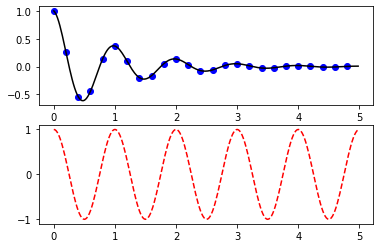

In [8]:
from numpy import arange, linspace, pi, exp, cos
def f(t):
    return exp(-t) * cos(2*pi*t)

t1 = arange(0.0, 5.0, 0.2)
t2 = arange(0.0, 5.0, 0.02)

plt.subplot(211) #2 lignes, 1 colonne, graphique 1
plt.plot(t1, f(t1), 'bo') # nuage de points bleus
plt.plot(t2, f(t2), 'k') # courbe noire

plt.subplot(212) #2 lignes, 1 colonne, graphique 2
plt.plot(t2, cos(2*pi*t2), 'r--')
plt.show()

## Cercle

Pour tracer un cercle, on a besoin d’avoir un repère orthonormé. Pour cela, on utilise l’instruction : `axis(’equal’)`.  
Il existe plusieurs méthodes pour tracer un cercle. L'une d'entre elles consiste à utiliser les coordonnées polaires.

### Exemple

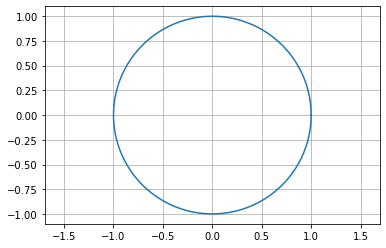

In [9]:
plt.axis('equal')
from numpy import linspace, pi, cos, sin
Ltheta = linspace(0, 2*pi, 100)
Lx = cos(Ltheta)
Ly = sin(Ltheta)
plt.plot(Lx, Ly)
plt.grid()
plt.show()

### 4. Représentations de séries statistiques et probabilités
 
#### (a) Diagrammes en barres
L’instruction pour obtenir un diagramme en barres est : `bar(Liste_des_valeurs, Liste_des_effectifs ou Liste_des_frequences)` 

Les éléments de la liste des valeurs peuvent être de type `str`.  
Quelques options :  
`width` : valeur entre 0 et 1: indique la largeur relative de chaque barre (par défaut, 0.8, c’est à dire 20% d’espace vide entre chaque barre).  
`color` : indique la couleur des barres, par exemple, ’r’ pour rouge, elles sont bleues par défaut.  
`edgecolor` : indique la couleur des encadrements. Par défaut, il n’a y en a pas c’est-à-dire que `edgecolor= ’None'`  
`linewidth` : pour indiquer l’épaisseur des traits




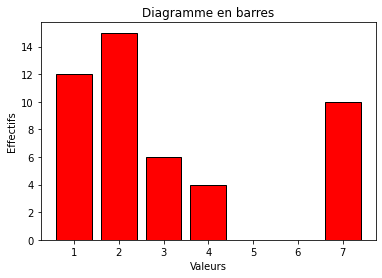

In [10]:
Lvaleurs = [1,2,3,4,7]
Leffectifs = [12,15,6,4,10]
plt.bar(Lvaleurs, Leffectifs, color = 'r', edgecolor = 'k')
plt.title("Diagramme en barres")
plt.xlabel("Valeurs")
plt.ylabel("Effectifs")
plt.show()

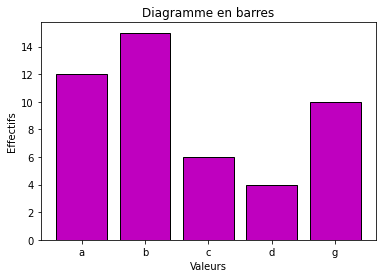

In [11]:
Lvaleurs = ['a','b','c','d','g']
Leffectifs = [12,15,6,4,10]
plt.bar(Lvaleurs, Leffectifs, color = 'm', edgecolor = 'k')
plt.title("Diagramme en barres")
plt.xlabel("Valeurs")
plt.ylabel("Effectifs")
plt.show()

#### (b) Diagramme circulaire

Il faut utiliser un repère orthonormé. Pour représenter une série qualitative, donnée par la liste des valeurs et la liste des effectifs, on obtient un diagramme circulaire en écrivant l’instruction :
`pie(Leffectifs, labels = Lvaleurs, autopct = ’%1.1f%%’)`

Le paramètre `autopct = ’%1.1f%%’` permet d’afficher les pourcentages dans chaque part.

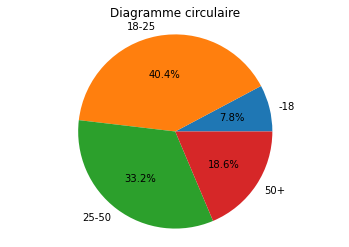

In [12]:
LValeurs = ['-18','18-25','25-50','50+']
Leffectifs= [5000, 26000, 21400, 12000]
plt.pie(Leffectifs, labels=LValeurs, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Diagramme circulaire")
plt.show()

#### (c) Diagramme en boîte

Pour tracer un histogramme à partir d’une liste de valeurs, on écrit l’instruction :
`boxplot(Lvaleurs)`.  

Par défaut, les moustaches s’étendent de 1.5 fois la distance interquartile, mais on peut le changer :
`boxplot(Lvaleurs, whis = ’range’)` : pour avoir des moustaches étendues jusqu’aux valeurs minimum et maxi-mum.
Le paramètre `vert = 0` permet d’avoir une boite horizontale.

### Exemple 
On peut représenter plusieurs séries sur le même graphique, il suffit pour cela d’écrire en argument la liste des listes des valeurs.
`boxplot([Lvaleurs1, Lvaleurs2, Lvaleurs3...])`

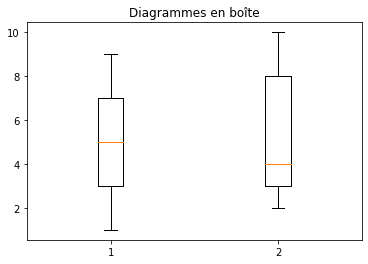

In [13]:
Lvaleurs1 = [1,2,3,4,5,6,7,8,9]
Lvaleurs2 = [2,2,2,4,4,4,6,8,8,10,10]
plt.boxplot([Lvaleurs1, Lvaleurs2])
plt.title("Diagrammes en boîte")
plt.show()

#### (d) Histogrammes
Pour tracer un histogramme à partir d’une liste de valeurs, on écrit l’instruction :
`hist(Lvaleurs, range = (a,b), bins = c)`

Le paramètre `range=(a,b)` permet de préciser que l’on représente les valeurs comprises entre a et b.  
En particulier, on peut ainsi choisir la borne inférieure de la première classe et la borne supérieure de la dernière classe que l’on souhaite avoir. Par défaut, a est le minimum de la série et b est son maximum.   
Le paramètre `bins = c` permet d’indiquer le nombre de classes, qui seront alors de même amplitude.

Le paramètre `density = True` permet de tracer l’histogramme des fréquences. 
Par défaut, on a `density = False`.


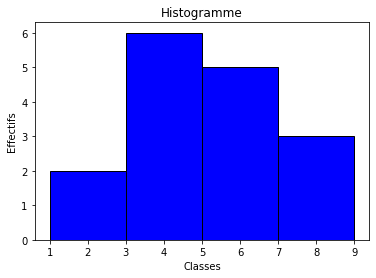

In [14]:
Lvaleurs=[1,2,3,3,4,4,5,6,6,8,5,4,4,6,8,9]
plt.hist(Lvaleurs, bins = 4, color = 'b', edgecolor = 'k')
plt.title("Histogramme")
plt.xlabel("Classes")
plt.ylabel("Effectifs")
plt.show()

Pour faire un histogramme avec des classes d’amplitudes inégales, il suffit de préciser la liste des bornes des intervalles que l’on veut. (Attention, l'axe des ordonnées reste gradué.)

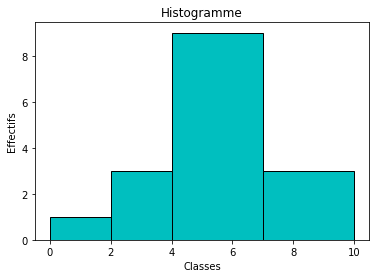

In [15]:
Lvaleurs=[1,2,3,3,4,4,5,6,6,8,5,4,4,6,8,9]
Lbornes=[0,2,4,7,10]
plt.hist(Lvaleurs, Lbornes, color = 'c', edgecolor = 'k')
plt.title("Histogramme")
plt.xlabel("Classes")
plt.ylabel("Effectifs")
plt.show()

## Mémento mathplotlib.pyplot

Rappeil : En important la bibliothèque pyplot de Matplotlib avec l'instruction : `import matplotlib.pyplot as plt`, tous les appels d'instructions de `pyplot` seront à faire précéder de  `plt`.

#### axes, titres et légende 
`axis([xmin,xmax,ymin,ymax])` : cadre la figure sur le rectangle décrit par les 4 coordonnées  
`grid()` : affiche la grille  
`axis(’equal’)` : produit un repère orthonormé  

`axvline(a)` : affiche la droite d’équation $x = a$   
`axhline(b)` : affiche la droite d’équation $y = b$    

`title(str)` : affiche un titre  
`xlabel(str)` : affiche une légende pour décrire l’axe horizontal  
`ylabel(str)` : affiche une légende pour décrire l’axe vertical  

`text(a, b, str)` : affiche le texte à partir du point de coordonnées(a, b)  
`text(a, b, r"$ formule en Latex$")` : affiche la formule en Latex à partir du point de coordonnées(a, b)  



`plot(a, b, ”go”)` : affiche le point de coordonnées(a; b) sous forme d’un rond vert  
`plot([x1,x2],[y1,y2],”b-”)` : affiche le segment en bleu et trait plein  
`plot(Liste_des_x, Liste_des_y, ”o–b”)` : affiche la ligne polygonale en bleu et trait pointillé et affiche les points en rond

#### options
— couleur :`'b'`: bleu,  `'r'` : rouge, `'g'` : green, `'c'` : cyan,  `'m'` : magenta,  `'y'` : jaune,`'k'` : noir    
— type de ligne: `'-'` : trait plein, `'--'` : trait pointillé, `'-.'` : trait alterné  
— type de point: `'.'` : point,  `'o'` : rond, `'s'` : carré, `'x'` : croix, `'*'` : étoile   
— taille des points : `markersize` = valeur numérique


`show()` : affiche la figure courante  
`savefig(name)` : sauvegarde la figure courante dans le fichier name

## Références
Galerie d'exemples : https://matplotlib.org/gallery/index.html